Name:     AmirReza Azari        
Student ID: 99101087

**Part 1**

 Write two functions named "camera_matrix" and "camera_projection". The first one gets all the camera parameters, containing λ, f (focal length), Sx, Sy, Sθ, Ox, Oy, R, T, and returns the camera matrix (Please provide comments above each stage of transformation). The second function projects a given 3D point on image and returns a 2D point in pixel coordinates.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def camera_matrix(landa, f, Sx, Sy, S_theta, Ox, Oy, R, T):

    matrix = np.matrix([[f*Sx, f*S_theta, Ox],
                       [0, f*Sy, Oy],
                       [0, 0, 1]])
    
    p_mat = np.matrix([[1,0,0,0],
                      [0,1,0,0],
                      [0,0,1,0]])
    base_mat = np.matrix([0,0,0,1])
    rt_mat = np.concatenate((R, T), axis=1)
    rt_mat = np.concatenate((rt_mat, base_mat), axis=0)
    
    matrix = np.matmul(matrix, p_mat)
    matrix = np.matmul(matrix, rt_mat)
    return matrix/landa

def camera_projection(X, Y, Z, matrix):

    main_mat = np.matrix([[X],
                         [Y],
                         [Z],
                         [1]])
    
    proj_mat = np.matmul(matrix, main_mat)
    x = proj_mat.item((0, 0)) / proj_mat.item((2, 0))
    y = proj_mat.item((1, 0)) / proj_mat.item((2, 0))

    return x, y


**Part 2**

Consider a pinhole camera with center located at (1, 1, -3), which its focal length is 100, scale factors (Sx, Sy) are both 1 and pixel coordinates of principal point is (50, 50). Also skew parameter is zero. The angle of the camera is such that the optical axis of the camera is parallel to the z axis. Using the previous function obtain the whole camera matrix.

In [2]:
landa = 1
R = np.matrix([[1,0,0],
              [0,1,0],
              [0,0,1]])
T = np.matrix([[-1],
              [-1],
              [3]])
f = 100
Sx = 1
Sy = 1 
S_theta = 0 
Ox = 50
Oy = 50
matrix = camera_matrix(landa, f, Sx, Sy, S_theta, Ox, Oy, R, T)
print(matrix)

[[100.   0.  50.  50.]
 [  0. 100.  50.  50.]
 [  0.   0.   1.   3.]]


**Part 3**

Suppose that vector V: (0, 1, 1) is located at (1, 1, 3) in 3D space. Apply the obtained camera matrix to V. Plot the result in pixel coordinates in a 2D plot. From which step of projection the length of the vector changes?

پس از تولید بردار با ماتریس کالیبراسیون، طول بردار در نتیجه ضرب فاکتورهای مقیاس به بردار تغییر می کند.
(result of multiplying scale factors to vector)

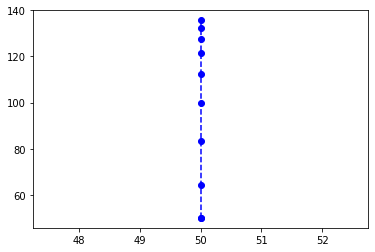

In [3]:
# p_1_x, p_1_y = camera_projection(1, 1, 3, matrix)
# p_2_x, p_2_y = camera_projection(1, 2, 4, matrix)
x_values = []
y_values = []
x = 1
y = 1
z = 3
for i in range(10):
    p_1_x, p_1_y = camera_projection(x, y, z, matrix)
    x_values.append(p_1_x)
    y_values.append(p_1_y)
    x = x
    y = y + i * 1
    z = z + i * 1
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.show()

**Part 4**

If the camera is rotated by +25 degrees around x axis, how would R and T change? What would the final image be?

[[100.          21.13091309  45.31538935  50.        ]
 [  0.         111.76169179   3.05356318  50.        ]
 [  0.           0.42261826   0.90630779   3.        ]]


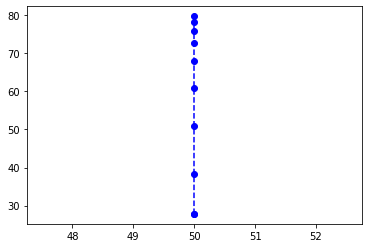

In [4]:
import math
# T does not change
R = np.matrix([[1, 0, 0],
              [0, math.cos(np.pi/180*25), -math.sin(np.pi/180*25)],
              [0, math.sin(np.pi/180*25), math.cos(np.pi/180*25)]])
matrix = camera_matrix(landa, f, Sx, Sy, S_theta, Ox, Oy, R, T)
print(matrix)
x_values = []
y_values = []
x = 1
y = 1
z = 3
for i in range(10):
    p_1_x, p_1_y = camera_projection(x, y, z, matrix)
    x_values.append(p_1_x)
    y_values.append(p_1_y)
    x = x
    y = y + i * 1
    z = z + i * 1
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.show()